In [1]:
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

In [2]:
def Irregular2(n, m, h):
    # Create meshgrid
    x, y = jnp.meshgrid(jnp.arange(-1, 1 + h, h), jnp.arange(-1, 1 + h, h))

    # Convert to polar coordinates
    teta, r = jnp.arctan2(y, x), jnp.sqrt(x**2 + y**2)

    # Initialize constants
    t = jnp.arange(0, 2 * jnp.pi, jnp.pi / 80)
    a = 0.50012563
    b = 0.250012563

    # Boundary curve
    xb = (a + b * jnp.cos(m * t) * jnp.sin(n * t)) * jnp.cos(t)
    yb = (a + b * jnp.cos(m * t) * jnp.sin(n * t)) * jnp.sin(t)

    # Function to check condition
    def condition(theta, radius):
        cos_theta, sin_theta = jnp.cos(theta), jnp.sin(theta)
        left = (radius * cos_theta)**2 + (radius * sin_theta)**2
        right = ((a + b * jnp.cos(m * theta) * jnp.sin(n * theta)) * cos_theta)**2 + \
                ((a + b * jnp.cos(m * theta) * jnp.sin(n * theta)) * sin_theta)**2 - 0.01
        return left < right

    # Flatten arrays for processing
    teta_flat, r_flat = teta.ravel(), r.ravel()

    # Apply the condition to find valid points
    valid_points = vmap(condition)(teta_flat, r_flat)
    xd = (r_flat * jnp.cos(teta_flat))[valid_points]
    yd = (r_flat * jnp.sin(teta_flat))[valid_points]

    return xb, yb, xd, yd


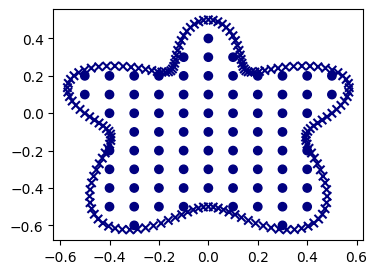

In [3]:
fig = plt.figure(figsize=(4,3))
xb, yb, xd, yd = Irregular2(2, 3, 0.1)
bc = jnp.zeros_like(yb)
dc = jnp.zeros_like(yd)
plt.scatter(xb, yb, c=bc, marker='x', vmin=0, vmax=1,cmap=cm.jet)
plt.scatter(xd, yd, c=dc, marker='o', vmin=0, vmax=1,cmap=cm.jet)
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=0, vmax=1)

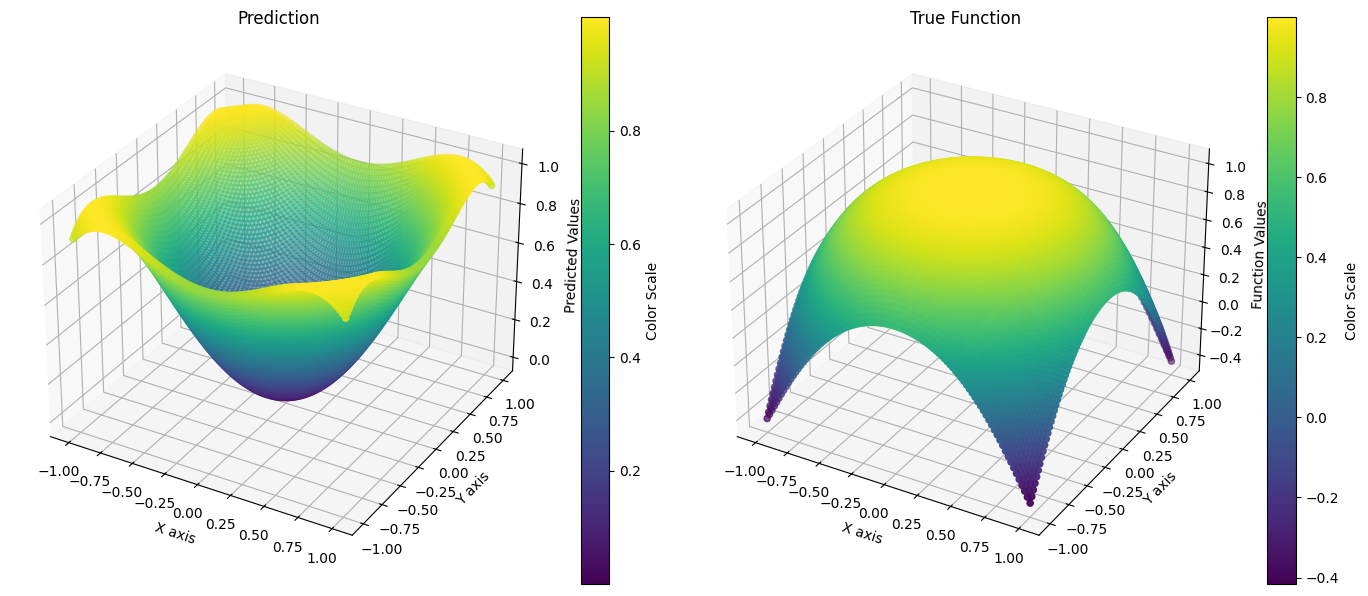

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
pred = np.sin(x**2 + y**2)  # Example data for first plot
u = lambda x, y: np.cos(x**2 + y**2)  # Example function for second plot

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})

# First subplot
ax1 = axes[0]
scatter1 = ax1.scatter(x, y, pred, c=pred, cmap='viridis', label='Prediction')
fig.colorbar(scatter1, ax=ax1, label='Color Scale')
ax1.set_title('Prediction')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Predicted Values')

# Second subplot
ax2 = axes[1]
z2 = u(x, y)
scatter2 = ax2.scatter(x, y, z2, c=z2, cmap='viridis', label='True Function')
fig.colorbar(scatter2, ax=ax2, label='Color Scale')
ax2.set_title('True Function')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Function Values')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

